# PGR Analysis Notebook

In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Import peakplot package
import peakplot

## Data File Lists and Birth Times

In [2]:
pgr_ity_file = ['pgr_it_data/pgr_ity1.h5',
                'pgr_it_data/pgr_ity2.h5',
                'pgr_it_data/pgr_ity3.h5',
                'pgr_it_data/pgr_ity4.h5',
                'pgr_it_data/pgr_ity5.h5',
                'pgr_it_data/pgr_ity6.h5',
                'pgr_it_data/pgr_ity7.h5']

ctrl_ity_file = ['pgr_it_data/ctrl_ity1.h5',
                 'pgr_it_data/ctrl_ity2.h5',
                 'pgr_it_data/ctrl_ity3.h5',
                 'pgr_it_data/ctrl_ity4.h5',
                 'pgr_it_data/ctrl_ity5.h5',
                 'pgr_it_data/ctrl_ity6.h5',
                 'pgr_it_data/ctrl_ity7.h5',
                 'pgr_it_data/ctrl_ity8.h5']

pgr_itc_file = ['pgr_it_data/pgr_itc1.h5',
                'pgr_it_data/pgr_itc2.h5',
                'pgr_it_data/pgr_itc3.h5',
                'pgr_it_data/pgr_itc4.h5',
                'pgr_it_data/pgr_itc5.h5',
                'pgr_it_data/pgr_itc6.h5',
                'pgr_it_data/pgr_itc7.h5',
                'pgr_it_data/pgr_itc8.h5']

ctrl_itc_file = ['pgr_it_data/ctrl_itc1.h5',
                 'pgr_it_data/ctrl_itc2.h5',
                 'pgr_it_data/ctrl_itc3.h5',
                 'pgr_it_data/ctrl_itc4.h5',
                 'pgr_it_data/ctrl_itc5.h5',
                 'pgr_it_data/ctrl_itc6.h5']

In [3]:
# Birth times (Gestational days are expressed as GD 18 = 1/18, etc)
pgr_itc_birth = [['1/19 5:31', '1/19 5:52', '1/19 6:07', '1/19 6:52', '1/19 6:59', '1/19 7:08'],
             ['1/19 5:53', '1/19 5:59', '1/19 6:03', '1/19 7:13', '1/19 22:08', '1/19 23:13'],
             ['1/19 2:18', '1/19 2:22', '1/19 3:06', '1/19 3:12', '1/19 3:21', '1/19 3:50', '1/19 4:20', '1/19 4:37'],
             ['1/19 16:06'],
             ['1/19 14:10'],
             ['1/19 0:15', '1/19 0:34', '1/19 0:40', '1/19 0:46', '1/19 1:27', '1/19 16:08'],
             ['1/19 13:56', '1/19 16:14', '1/19 16:25', '1/19 16:27', '1/19 16:34', '1/19 16:53', '1/19 17:10', '1/19 17:19', '1/19 18:16'],
             ['1/19 10:37', '1/19 10:52', '1/19 11:02', '1/19 11:11', '1/19 12:24', '1/19 12:30', '1/19 12:42']]
             
ctrl_itc_birth = [['1/19 5:09', '1/19 5:18', '1/19 5:28' ,'1/19 5:24'],
              ['1/19 14:45', '1/19 14:48', '1/19 15:14', '1/19 15:27', '1/19 15:33', '1/19 15:34', '1/19 15:53', '1/19 15:55', '1/19 16:07'],
              ['1/19 8:06', '1/19 8:18' ,'1/19 8:21', '1/19 8:28', '1/19 8:42', '1/19 8:53', '1/19 8:57', '1/19 9:14'],
              ['1/19 11:08', '1/19 11:21', '1/19 11:25', '1/19 11:32', '1/19 11:44', '1/19 11:56', '1/19 12:08', '1/19 12:29'],
              ['1/19 11:35', '1/19 11:45', '1/19 11:52', '1/19 12:01', '1/19 12:05', '1/19 12:08', '1/19 12:27' ,'1/19 12:31', '1/19 12:58'],
              ['1/19 9:40', '1/19 10:03', '1/19 10:09', '1/19 10:16', '1/19 10:35']]

pgr_ity_birth = [['1/19 8:07', '1/19 8:16', '1/19 8:42', '1/19 9:27', '1/19 9:46', '1/19 10:56'],
             ['1/19 6:48', '1/19 7:07', '1/19 7:28', '1/19 7:50'],
             ['1/19 6:10', '1/19 6:20', '1/19 6:24', '1/19 6:46', '1/19 6:57', '1/19 7:01', '1/19 7:18', '1/19 7:25'],
             ['1/19 10:16', '1/19 10:23', '1/19 10:30', '1/19 10:38', '1/19 10:45', '1/19 11:06', '1/19 11:28'],
             ['1/19 1:59', '1/19 2:11', '1/19 2:18', '1/19 2:36', '1/19 3:43'],
             ['1/19 1:49', '1/19 2:21', '1/19 2:48', '1/19 3:11', '1/19 3:23'],
             ['1/19 1:32', '1/19 2:01', '1/19 2:25', '1/19 2:36', '1/19 2:41', '1/19 2:53', '1/19 3:00', '1/19 3:11']]
             
ctrl_ity_birth = [['1/19 8:24', '1/19 8:41', '1/19 8:51', '1/19 8:58', '1/19 9:02', '1/19 9:11', '1/19 9:27', '1/19 10:03'],
             ['1/19 6:26', '1/19 6:36', '1/19 6:52', '1/19 6:56', '1/19 7:02', '1/19 7:04', '1/19 7:22', '1/19 7:33'],
             ['1/19 2:02', '1/19 2:12', '1/19 2:20', '1/19 2:53', '1/19 3:13'],
             ['1/19 6:24', '1/19 6:44', '1/19 6:49', '1/19 6:56', '1/19 7:15', '1/19 7:19', '1/19 7:33'],
             ['1/19 6:09', '1/19 6:44', '1/19 6:50', '1/19 7:06', '1/19 7:13', '1/19 7:20', '1/19 7:35'],
             ['1/19 7:37', '1/19 7:55', '1/19 8:06', '1/19 8:16', '1/19 8:18', '1/19 8:28', '1/19 8:39', '1/19 8:44'],
             ['1/19 6:29', '1/19 6:34', '1/19 6:51', '1/19 6:54', '1/19 6:55', '1/19 7:08', '1/19 7:12'],
             ['1/18 21:17', '1/18 21:25', '1/18 21:26', '1/18 21:39', '1/18 21:41', '1/18 21:46', '1/18 21:54', '1/18 21:57']]

## Main Analysis: Peak Detection During Labor (0-2h)

In [4]:
# Generate data matrices for labor period
sample_interval = '1s'
time_range = [0, 7200]  # 0-2 hours

pgr_itc_mat = peakplot.get_plot_mat(pgr_itc_file, time_range=time_range, 
                                   interval=sample_interval, resample_method='mean')
pgr_ity_mat = peakplot.get_plot_mat(pgr_ity_file, time_range=time_range, 
                                   interval=sample_interval, resample_method='mean')
ctrl_itc_mat = peakplot.get_plot_mat(ctrl_itc_file, time_range=time_range, 
                                    interval=sample_interval, resample_method='mean')
ctrl_ity_mat = peakplot.get_plot_mat(ctrl_ity_file, time_range=time_range, 
                                    interval=sample_interval, resample_method='mean')

In [5]:
# Extract peak statistics with optimal parameters
p = 20
h = 40
num_peaks = None
data = [ctrl_ity_mat, pgr_ity_mat, ctrl_itc_mat, pgr_itc_mat]
labels = ['ctrl_ity', 'pgr_ity', 'ctrl_itc', 'pgr_itc']
xticks, peak_values, mean_values = peakplot.get_stat_data(data, labels, p, h, num_peaks)

# Calculate median values
median_values = {}
for idx, peaks in enumerate(peak_values):
    if xticks[idx] in median_values:
        median_values[xticks[idx]].append(np.median(peaks))
    else:
        median_values[xticks[idx]] = [np.median(peaks)]

# Export results
peakplot.list2csv(median_values.values(), 'pgr_peak_median.csv')
peakplot.list2csv(mean_values, 'pgr_peak_mean.csv')
peakplot.list2csv(peak_values, 'pgr_all_peaks.csv')

## Pre-labor Analysis (Day before birth)

In [6]:
# Generate data matrices for pre-labor period
day_range = ['1/18 0:00', '1/18 18:00']

pgr_itc_premat = peakplot.get_plot_mat(pgr_itc_file, day_range=day_range, birth_time=pgr_itc_birth,
                                      interval=sample_interval, resample_method='mean')
pgr_ity_premat = peakplot.get_plot_mat(pgr_ity_file, day_range=day_range, birth_time=pgr_ity_birth,
                                      interval=sample_interval, resample_method='mean')
ctrl_itc_premat = peakplot.get_plot_mat(ctrl_itc_file, day_range=day_range, birth_time=ctrl_itc_birth,
                                       interval=sample_interval, resample_method='mean')
ctrl_ity_premat = peakplot.get_plot_mat(ctrl_ity_file, day_range=day_range, birth_time=ctrl_ity_birth,
                                       interval=sample_interval, resample_method='mean')

In [7]:
# Extract pre-labor peak statistics
data = [ctrl_ity_premat, pgr_ity_premat, ctrl_itc_premat, pgr_itc_premat]
xticks, peak_values, mean_values = peakplot.get_stat_data(data, labels, p, h, num_peaks)

median_values = {}
for idx, peaks in enumerate(peak_values):
    if xticks[idx] in median_values:
        median_values[xticks[idx]].append(np.median(peaks))
    else:
        median_values[xticks[idx]] = [np.median(peaks)]

peakplot.list2csv(median_values.values(), 'pgr_pre_peak_median.csv')
peakplot.list2csv(mean_values, 'pgr_pre_peak_mean.csv')
peakplot.list2csv(peak_values, 'pgr_pre_all_peaks.csv')

## Visualization: Pressure Heatmaps

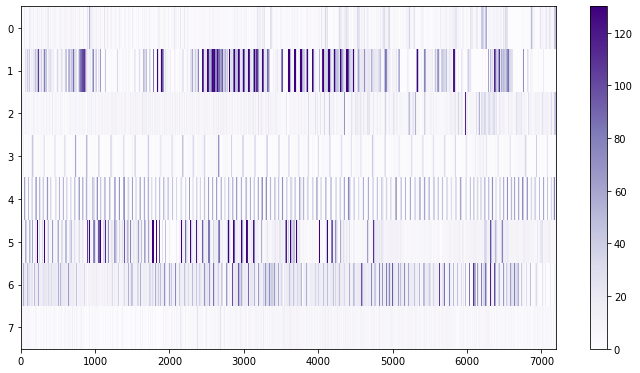

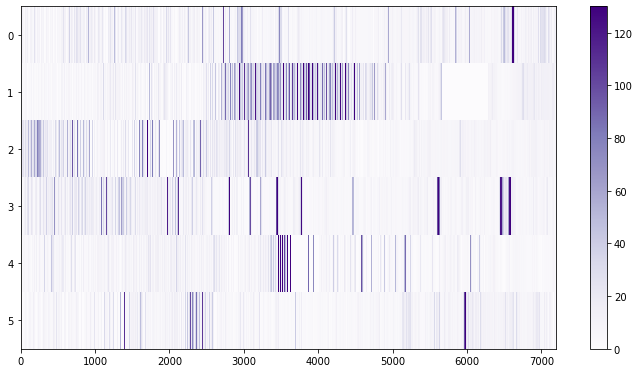

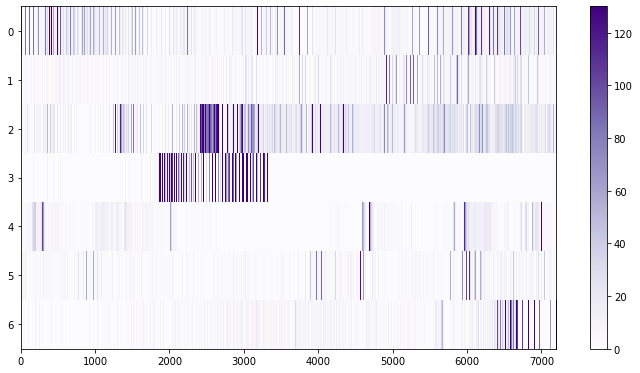

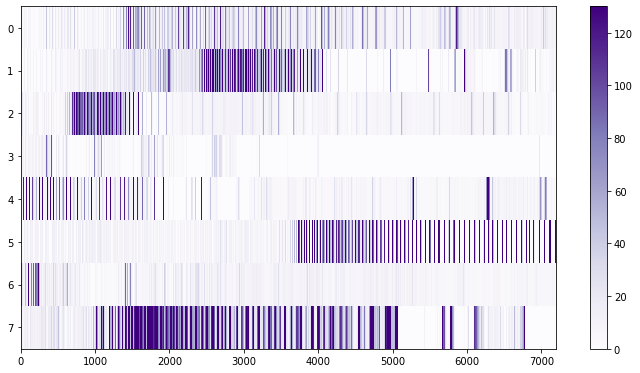

In [8]:
# Plot pressure matrices
for mat, name in [(pgr_itc_mat, 'pgr_itc'), (ctrl_itc_mat, 'ctrl_itc'), 
                  (pgr_ity_mat, 'pgr_ity'), (ctrl_ity_mat, 'ctrl_ity')]:
    plot_mat = np.copy(mat)
    plot_mat[plot_mat < 0] = 0
    plot_mat[np.isnan(plot_mat)] = 0

    plt.figure(figsize=(12, 6.3))
    plt.imshow(plot_mat, cmap='Purples', vmin=0, vmax=130, aspect='auto', interpolation='nearest')
    plt.colorbar()
    plt.savefig(f'{name}_mat2.pdf', dpi=300)
    plt.show()

## Birth Timing Analysis

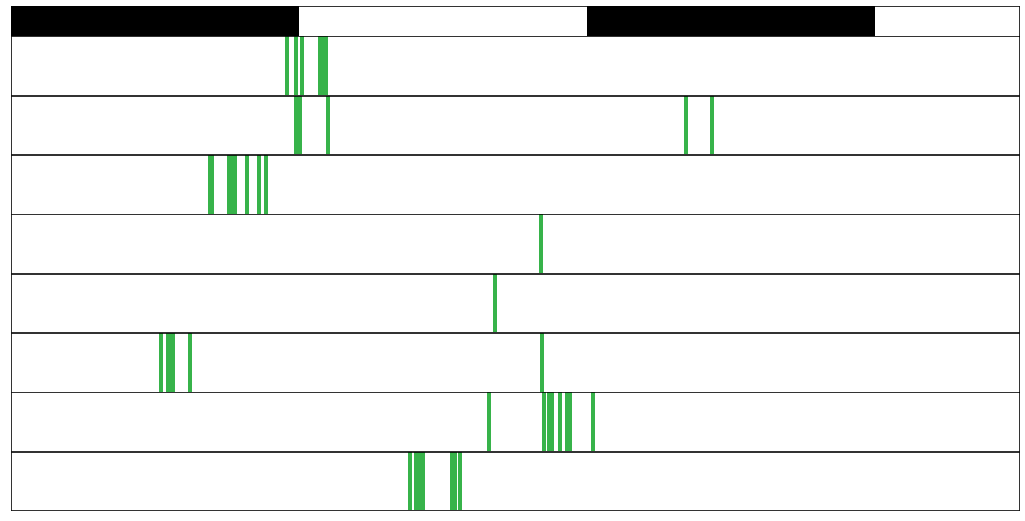

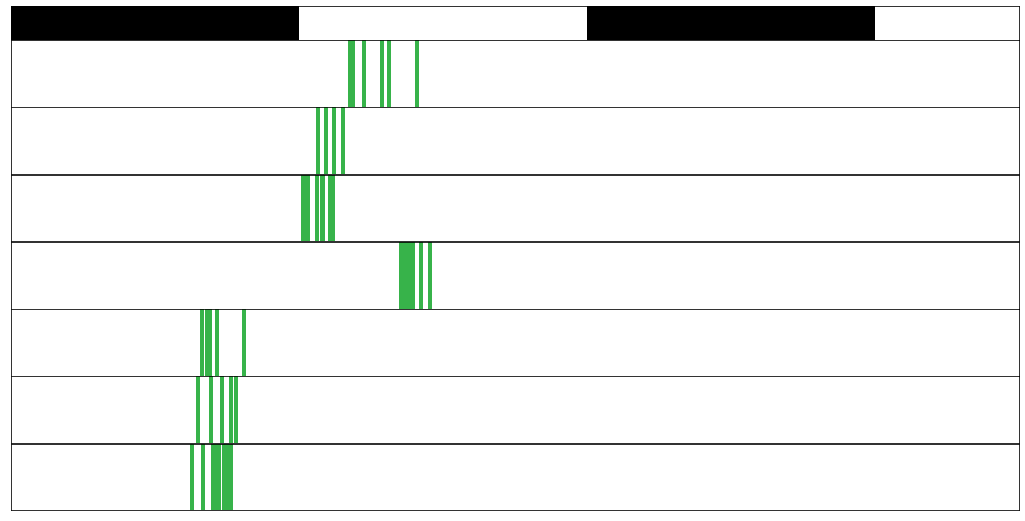

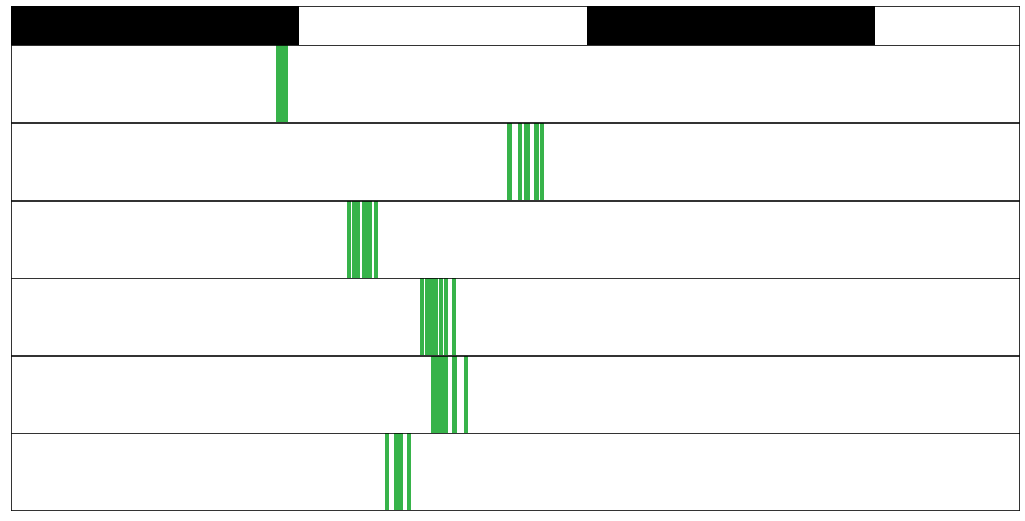

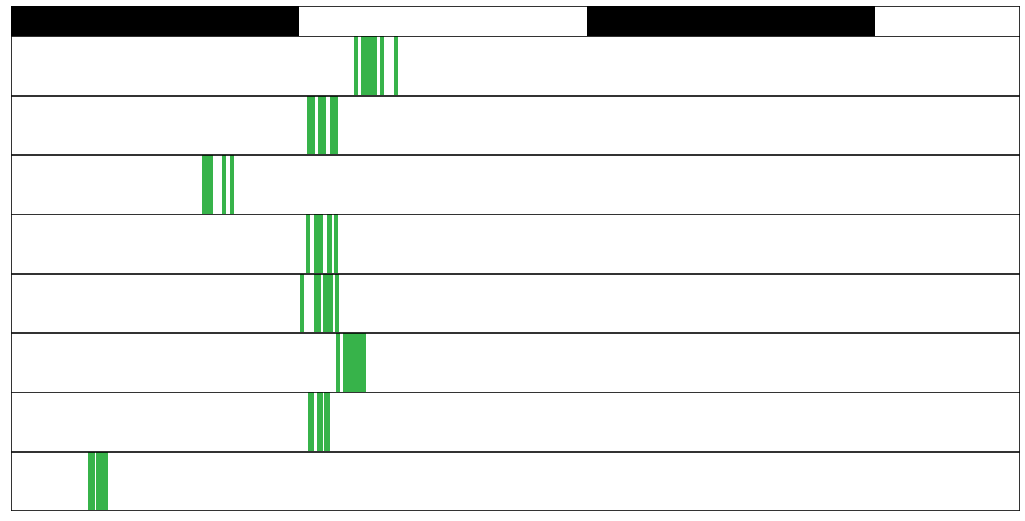

In [9]:
# Plot birth timing patterns
peakplot.plot_birthtimes(pgr_itc_birth, 'pgr_itc_birthtime.pdf', birth_color='#37b34a')
peakplot.plot_birthtimes(pgr_ity_birth, 'pgr_ity_birthtime.pdf', birth_color='#37b34a')
peakplot.plot_birthtimes(ctrl_itc_birth, 'ctrl_itc_birthtime.pdf', birth_color='#37b34a')
peakplot.plot_birthtimes(ctrl_ity_birth, 'ctrl_ity_birthtime.pdf', birth_color='#37b34a')

In [10]:
# Calculate birth intervals using package function
pgr_itc_interval = peakplot.get_mean_birth_interval(pgr_itc_birth, 
                                                   completed=[True, True, True, False, False, True, True, True])
pgr_ity_interval = peakplot.get_mean_birth_interval(pgr_ity_birth)
ctrl_itc_interval = peakplot.get_mean_birth_interval(ctrl_itc_birth)
ctrl_ity_interval = peakplot.get_mean_birth_interval(ctrl_ity_birth)

# Export intervals in minutes
peakplot.list2csv([ctrl_ity_interval/60, pgr_ity_interval/60, 
                  ctrl_itc_interval/60, pgr_itc_interval/60], 'pgr_all_interval.csv')

## Zeitgeber Time Analysis

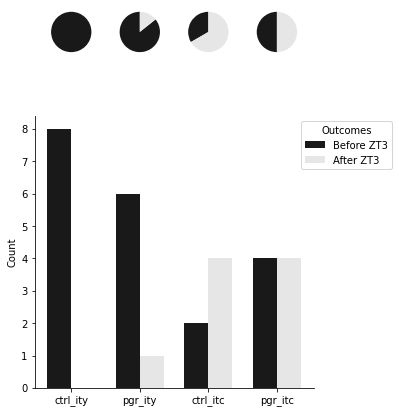

In [11]:
# Convert birth times to zeitgeber time
zeit_list = [peakplot.birth2zeit(bt) for bt in [ctrl_ity_birth, pgr_ity_birth, ctrl_itc_birth, pgr_itc_birth]]
peakplot.list2csv(zeit_list, 'pgr_birth_start.csv')

# ZT3 analysis using package function
data = np.zeros([len(zeit_list), 2])
for idx, time in enumerate(zeit_list):
    data[idx, :] = [sum(time < 3), sum(time >= 3)]
    
treatments = ['ctrl_ity', 'pgr_ity', 'ctrl_itc', 'pgr_itc']
outcomes = ["Before ZT3", "After ZT3"]

peakplot.plot_bar_with_pies(data, output_file='pgr_zt_plot.pdf',
                           treatment_labels=treatments, outcome_labels=outcomes)

## Post-labor Analysis (2-8h after birth onset)

In [12]:
# Generate post-labor data matrices
time_range = [7200, 3600 * 8]  # 2-8 hours

pgr_itc_postmat = peakplot.get_plot_mat(pgr_itc_file, time_range=time_range,
                                       interval=sample_interval, resample_method='mean')
pgr_ity_postmat = peakplot.get_plot_mat(pgr_ity_file, time_range=time_range,
                                       interval=sample_interval, resample_method='mean')
ctrl_itc_postmat = peakplot.get_plot_mat(ctrl_itc_file, time_range=time_range,
                                        interval=sample_interval, resample_method='mean')
ctrl_ity_postmat = peakplot.get_plot_mat(ctrl_ity_file, time_range=time_range,
                                        interval=sample_interval, resample_method='mean')

# Extract and export post-labor statistics using package function
data = [ctrl_ity_postmat, pgr_ity_postmat, ctrl_itc_postmat, pgr_itc_postmat]
xticks, peak_values, mean_values = peakplot.get_stat_data(data, labels, p, h, num_peaks)

median_values = {}
for idx, peaks in enumerate(peak_values):
    if xticks[idx] in median_values:
        median_values[xticks[idx]].append(np.median(peaks))
    else:
        median_values[xticks[idx]] = [np.median(peaks)]

peakplot.list2csv(median_values.values(), 'pgr_post_peak_median.csv')
peakplot.list2csv(mean_values, 'pgr_post_peak_mean.csv')
peakplot.list2csv(peak_values, 'pgr_post_all_peaks.csv')